In [ ]:
# Dynamic time warping, networkx graph
    # class containing
        # trend id, prices, nearest neighbor, distance to nearest neighbor 
        # if trend has all distance matrices computed, pop to reduce calculations
# dimensionality reduction using pca, t-sne
# data generation, cnn

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlalchemy

from dtaidistance import dtw
from scipy import stats

from database_credentials import get_database_url
from load_transform import load_transform_combine, pivot

In [2]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [3]:
sell_data = load_transform_combine(5, connection)
sell_data = pivot(sell_data)
trends = sell_data.to_numpy()

In [35]:
# complete graph followed by edge removal
# standardize using z-score
trends = stats.zscore(trends)#, axis=1)

#scaler = StandardScaler()
#trends = scaler.fit_transform(trends)
num_trends = trends.shape[0]

distances = np.zeros((num_trends, num_trends))
graph = nx.Graph()

# compute distances, build graph, save distances
for x, y in np.ndindex(distances.shape):
    if (x > y):
        distance = dtw.distance(trends[x], trends[y])
        graph.add_weighted_edges_from([(x, y, distance)])
        distances[x][y] = distance
        distances[y][x] = distance  

# inf fill ?
np.fill_diagonal(distances, distances.max())

In [36]:
# increase weight, check degree (?)
# visualize and optimize weight cut-off / degree
min_distance = distances.min()
max_distance = distances.max()

weights = np.linspace(min_distance, max_distance, 1000)
reversed_weights = weights[::-1]
# print(reversed_weights[0], reversed_weights[1])

num_clusters = []
num_significant_clusters = []
for weight in reversed_weights:
    remove = [edge for edge in graph.edges(data=True) if edge[2]['weight'] > weight]
    graph.remove_edges_from(remove)
    
    components = [component for component in nx.connected_components(graph)]
    num_components = len(components)
    num_clusters.append(num_components)
    
    significant_components = [component for component in components if len(component) > 1]
    num_significant_components = len(significant_components)
    num_significant_clusters.append(num_significant_components)

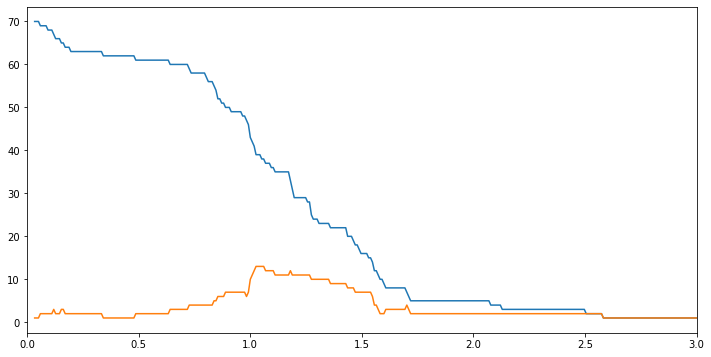

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=reversed_weights, y=num_clusters)
sns.lineplot(x=reversed_weights, y=num_significant_clusters)
plt.xlim(0, 3)
plt.show()

In [21]:
index = num_components.index(42)
reversed_weights[index]

1.0092986783473927

In [22]:
remove = [edge for edge in graph.edges(data=True) if edge[2]['weight'] > 1.0092986783473927]
graph.remove_edges_from(remove)

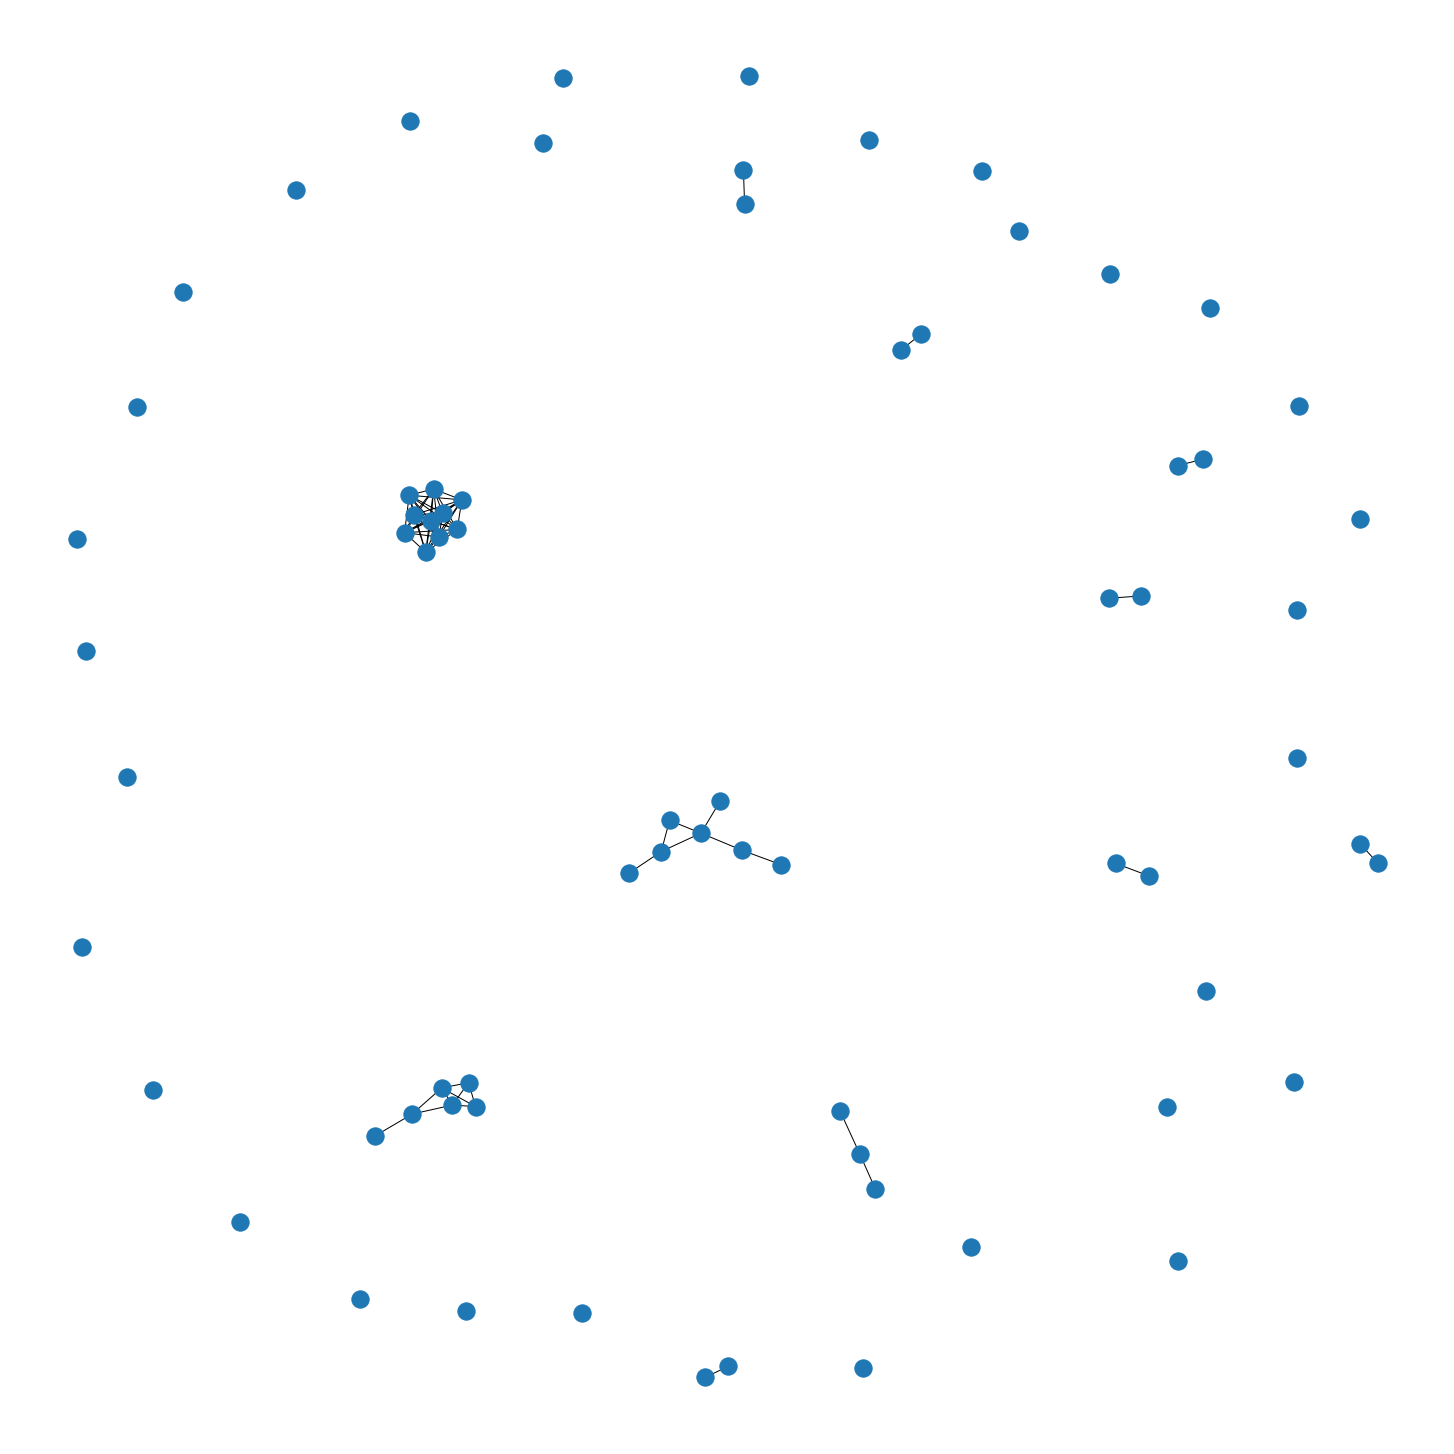

In [23]:
plt.figure(figsize=(20, 20))
nx.draw(graph)
plt.show()

In [24]:
# label components with len == 1 as one group (?)
for component in nx.connected_components(graph):
    print(component)

{64, 1, 38, 50, 21, 30}
{0, 5}
{49, 2}
{3}
{4}
{6}
{55, 7}
{70, 8, 40, 14, 53, 22, 59}
{9, 58, 27}
{10}
{11}
{12}
{13}
{15}
{16}
{65, 66, 35, 33, 68, 17, 25, 26, 29, 63}
{18}
{19}
{20}
{23}
{24}
{28}
{31}
{32, 42}
{34}
{36}
{37}
{39}
{41, 47}
{43, 45}
{44}
{46}
{48}
{51, 61}
{52}
{54}
{56}
{57}
{60}
{62}
{67}
{69}
